# Initial Value Problem for ODE: single-step methods

The solution process of an ODE is performed by steps. In a single-step approach, the solution of the following step depends on the current one. In a multiplestep method, the solution of the next step is calculated from several steps. A multiplestep approach is more accurate, you can think of a similar construct as the higher-order derivatives treated previously. 

For first order ODEs with the general form: 

$$
\frac{dy}{dx}=f(x,y)
$$

**One initial condition is needed to find only one solution!** Without it, there would be an infinite number of solutions possible. The initial condition is:

$$
y(x_0)=y_0
$$

# Forward Euler

The simplest initial Value Numerical Integration method is the Forward Euler, which is an explicit method. Although simple, it contains the basic characteristics as more advanced and accurate methods. It looks as:

$$
x_{i+1}=x_i+\Delta x 
$$
$$
y_{i+1}=y_i+\Delta x \cdot slope \rvert_i
$$

where $\Delta x$ is the step size and the slope is a constant that approximates the rate of change of $y$ with respect to $x$ (a.k.a. the derivative) in the interval $x_i$ to $x_{i+1}$. The solution starts at $i=0$ given by the initial condition, then $i$ is increased to 1 where the values are calculated using the previous equations. This loop continues until the points cover the desired domain. **The computation of the slope is the key difference between single step methods. For forward euler, the slope is computed with the values at the current step!** 


```{figure} figs/explicit_euler.png
:name: explicit_euler

Illustrating the forward Euler method
```



## Forward Euler Example

Consider the following equation: 

$$
\frac{dy}{dx}= y'=-y
$$
We want to know the solution in the domain $[a=0,b=30]$. The **initial condition** is $y(x_0)=1$ and the step size is $\Delta x = 0.2$.

The discretization of the differential equation transforms the problem into an algebraic one. Following the formula of explicit Euler for the discretization yields: 

$$
y_{i+1}= y_i + \Delta x *y'_i
$$

In the following code, Forward Euler is implemented.





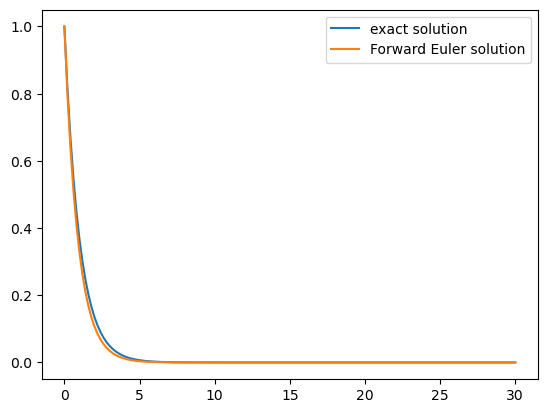

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

dx = .2
x = np.arange(0,30+dx,dx)
y = np.zeros(len(x))

##-----------------------------
##Forward Euler Implementation
##-----------------------------
alpha= 1
y[0] = 1
for i in range(len(x)-1): 
    y[i+1] = y[i] + dx*( -alpha*y[i])
##------------------------------

y_exact = np.exp(-alpha*x)
plt.plot(x,y_exact)
plt.plot(x,y)
plt.legend(['exact solution','Forward Euler solution'])


:::{card} Exercise 

Show that the **Forward Euler** can be derived from the **Finite Difference method**

hint: Use the forward difference that we derived earlier in the Taylor expansion chapter.

```{admonition} Solution
:class: tip, dropdown

In the Taylor expansion chapter we derived the forward difference for a first derivative: 

$$
f'(x_i)=\frac{f(x_{i+1})-f(x_i)}{\Delta x} + \mathcal{O}(\Delta x)
$$

$$
\Delta xf'(x_i)= f(x_{i+1})-f(x_i)+ \mathcal{O}(\Delta x)
$$

$$
f(x_{i+1}) = f(x_i) + \Delta x f'(x_i) + \mathcal{O}(\Delta x)
$$

```

:::

## Error analysis

There are two types of errors: round-off and truncation. The **round-off** error is due to the computer's limitation to represent a floating number (decimal). To illustrate it consider the following: the difference between 1 and 0.9 is 0.1. If you subtract 0.1 from itself, you should obtain 0, even if this subtraction is repeated ten thousand times. The following code demonstrates this behavior, using floating-point numbers with varying precision.  

In [4]:
def accumulated_error(a,b,solution,iterations):
    error = solution - np.abs(a-b) 
    error_accumulated = 0
    for i in range(iterations):
        error_accumulated = error_accumulated + error

    return error_accumulated

print('Error using 16 bits of memory = ',accumulated_error(np.float16(1.),np.float16(0.9),np.float16(0.1),10000))
print('Error using 32 bits of memory = ',accumulated_error(np.float32(1.),np.float32(0.9),np.float32(0.1),10000))
print('Error using 64 bits of memory = ',accumulated_error(np.float64(1.),np.float64(0.9),np.float64(0.1),10000))


Error using 16 bits of memory =  -1.220703125
Error using 32 bits of memory =  -0.00022351741790771484
Error using 64 bits of memory =  2.7755575615628914e-13


As you can see, this simple operation can give discernible errors. Imagine a computation spanning 100 years with a time step of seconds and more complex operations: the round-off error will be present! As you can see, this can be reduced by increasing the precision or the number of digits used to represent numbers but be careful, this is not free as the memory the computer uses increases as well as the computation time. 

The truncation error is related to the method chosen for the slopes approximation. This can be obtained using our reliable TSE as this gives the exact solution. Therefore **the truncation error per step** is 

$$
\text{Truncation error }= y^{TSE}(x_{i+1}) - y^{\text{Explicit Euler}}(x_{i+1}) 
$$

$$
\text{Truncation error }= y(x_i)+\Delta x y'_i  +\frac{(\Delta x)^2}{2!} y''_i + ... - y(x_i)-\Delta x y'_i  \approx \mathcal{O}(\Delta x^2)
$$

The **total truncation error** accounts for the number of steps as: 

$$
\text{Total truncation error } \approx  \sum_{i=0}^{n-1} \frac{(\Delta x)^2}{2!} y''_i \approx \frac{(\Delta x)^2}{2!} \frac{b-a}{\Delta x} \bar{y}'' \approx \mathcal{O}(\Delta x) 
$$

In honor to this first order total truncation error, Forward Euler is referred to as a first-order method.


## Stability

The error that is introduced in each step of the numerical solution ideally does not to increase as the solution advances. Under a well posed and proper solution, the error is expected to reduce with smaller steps. In some cases, the error increases without bound as the solution advances (even with smaller steps): **the solution becomes unstable**. The stability depends on the numerical method, the step size and the behavior of the differential equation. Therefore, the stability conditions will differ when applying the same numerical method to different equations. 

Let's consider the **stability for Forward Euler** applied to a more general form of the problem above.  

$$
\frac{dy}{dx} = y'=-\alpha y
$$

With initial condition $y(0)=1$ and $\alpha>0$, the exact solution is:

$$
y^{\text{exact}}(x_{i})=y_0 e^{-\alpha x_{i}}
$$

The Forward Euler equivalent is 

$$
y_{i+1}=y_{i}-\alpha y_i \Delta x=y_i(1+\alpha \Delta x)
$$

Following the initial steps of the numerical solution a pattern arises:

$$
y_{1}=y_0(1-\alpha \Delta x)
$$

$$
y_{2}=y_1(1+\alpha \Delta x) =y_0(1-\alpha \Delta x)^2 
$$

$$
y_{3}=y_2(1+\alpha \Delta x) =y_0(1-\alpha \Delta x)^3 
$$

$$
y_{n}=y_0(1-\alpha \Delta x)^n 
$$


Comparing this last equation with the exact solution, it can be seen that the term $(1-\alpha \Delta x)^n$ in the numerical solution is approximating the term $e^{-\alpha \Delta x_i}$ in the exact solution. The latter tends to decay with larger values of $x_i$ and positive $\alpha$. To make sure that the term $(1-\alpha \Delta x)^n$ decays with larger $n$ values $1-\alpha \Delta x$ should be less than $|1|$, i.e.,

$$
|1-\alpha \Delta x| < 1 \implies 0 < \alpha \Delta x < 2
$$

```{admonition} Click here for a more detailed derivation
:class: tip, dropdown
$$
-1 <1-\alpha \Delta x < 1 
$$

Subtract 1 of both sides
$$
-2 <-\alpha \Delta x < 0
$$

Divide by -1

$$
0 <\alpha \Delta x < 2
$$

```

This is the stability criterion. If not complied, then the solution will be unstable. It is said that **Explicit Euler is conditionally stable! This is true for every explicit numerical method.** 



:::{card} Exercise

Lets go back to the last example described in the code above.

$$
\frac{dy}{dx}= y'=-y
$$
We want to know the solution in the domain $[a=0,b=30]$. The **initial condition** is $y(x_0)=1$ and the step size is $\Delta x = 0.2$.

What is the step size at which the problem described using the Forward Euler becomes unstable? Feel free to use the interactive figure below and change dx to test what happens when the step size becomes larger.

Click `rocket` -->`Live Code` to interact with the plot below

:::

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def forward_euler(dx):
    # Define the x range and initialize y
    x = np.arange(0, 30 + dx, dx)
    y = np.zeros(len(x))
    
    # Forward Euler Implementation
    alpha = 1
    y[0] = 1
    for i in range(len(x) - 1):
        y[i + 1] = y[i] + dx * (-alpha * y[i])
    
    x_exact = np.arange(0, 30 + dx, 0.2)
    # Exact solution
    y_exact = np.exp(-alpha * x_exact)
    
    # Plot both solutions
    plt.figure(figsize=(8, 5))
    plt.plot(x_exact, y_exact, label='Exact solution', linestyle='--')
    plt.plot(x, y, label='Forward Euler solution', marker='o')
    plt.legend()
    plt.title(f"Forward Euler with dx = {dx}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Create an interactive slider for dx
interact(forward_euler, dx=widgets.FloatSlider(value=0.2, min=0.01, max=3.0, step=0.01, description='dx'));


interactive(children=(FloatSlider(value=0.2, description='dx', max=3.0, min=0.01, step=0.01), Output()), _dom_…

```{admonition} Solution
:class: tip, dropdown

You can see in the interactive figure above that when the stepsize becomes larger the forward euler solution becomes less accurate. You can also see that when the step size becomes bigger then 2 the Forward Euler solution starts to blow up. This is because of the stability criteria of the Forward Euler.

$$
0 <\alpha \Delta x < 2
$$

When $\alpha=1$, then $\Delta x < 2$  (Note that $\Delta x$ can not be negative and therefore will always be > 0 )

```

# Backward Euler



Just as Forward Euler is the simplest Explicit method, **Backward Euler method is the simplest implicit method**. They look very similar but the slope is computed at the next step! That's where the implicit term comes from: the slope depends on the unknown value.

$$
x_{i+1}=x_i+\Delta x 
$$
$$
y_{i+1}=y_i+\Delta x \cdot slope \rvert_{i+1}=y_i+\Delta x \cdot y'_{i+1}
$$

Let's consider the same problem as before: 

$$
\frac{dy}{dx}= y'=-\alpha y
$$
We want to know the solution in the domain $[a=0,b=30]$. The **initial condition** is $y(x_0)=1$ and the step size is $\Delta x = 0.2$.

The discretization of the differential equation transforms the problem into an algebraic one. Following the formula of implicit Euler, the discretization yields: 

$$
y_{i+1}= y_i - \Delta x \cdot \alpha y_{i+1}
$$

then

$$
y_{i+1}+ \Delta x \cdot \alpha y_{i+1} = y_i  
$$

finally

$$
y_{i+1}= y_i/(1+\Delta x \cdot \alpha)  
$$


In the following code, Implicit Euler is implemented.

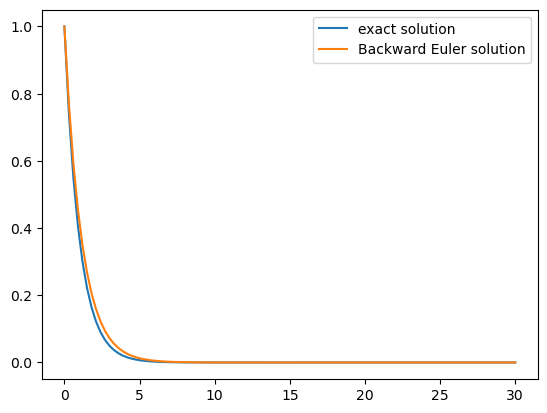

In [24]:
dx = 0.3
x = np.arange(0,30+dx,dx)
y = np.zeros(len(x))

##-----------------------------
##Backward Euler Implementation
##-----------------------------
alpha=1
y[0] = 1
for i in range(len(x)-1): 
    y[i+1] = y[i]/(1+dx*alpha)
##------------------------------

y_exact = np.exp(-alpha*x)
plt.plot(x,y_exact)
plt.plot(x,y)
plt.legend(['exact solution','Backward Euler solution'])

:::{card}
You can see that the result is similar to Forward Euler, except that the curve for Backward Euler is slightly above than the exact solution. This makes sense as the derivative is taken to be in front, so the slope is initially underestimated while the explicit solution initially overestimated the slope. 

The round-off errors and truncation error are similar. Backward Euler is also a first-order method. But what about the stability? 
:::

:::{card} Exercise:

Modify the step size in the Implicit Euler code, try to make the solution unstable. What do you notice?

:::

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def backward_euler(dx):
    # Define the x range and initialize y
    x = np.arange(0, 30 + dx, dx)
    y = np.zeros(len(x))
    
    ##-----------------------------
    ##Implicit Euler Implementation
    ##-----------------------------
    alpha=1
    y[0] = 1
    for i in range(len(x)-1): 
        y[i+1] = y[i]/(1+dx*alpha)
    ##------------------------------
    
    x_exact = np.arange(0, 30 + dx, 0.2)
    # Exact solution
    y_exact = np.exp(-alpha * x_exact)
    
    # Plot both solutions
    plt.figure(figsize=(8, 5))
    plt.plot(x_exact, y_exact, label='Exact solution', linestyle='--')
    plt.plot(x, y, label='Backward Euler solution', marker='o')
    plt.legend()
    plt.title(f"Backward Euler with dx = {dx}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [5]:



# Create an interactive slider for dx
interact(backward_euler, dx=widgets.FloatSlider(value=0.2, min=0.01, max=3.0, step=0.01, description='dx'));


interactive(children=(FloatSlider(value=0.2, description='dx', max=3.0, min=0.01, step=0.01), Output()), _dom_…

:::{card}

Let's understand what happens by following the same procedure as for the stability analysis of Explicit Euler.  

The exact solution is the same:

$$
y^{\text{exact}}(x_{i})=y_0 e^{-\alpha x_{i}}
$$


For the numerical solution, the numerical solution pattern is slightly different:

$$
y_{1}=y_0\left(\frac{1}{1+\alpha \Delta x}\right)
$$

$$
y_{2}=y_1\left(\frac{1}{1+\alpha \Delta x}\right) =y_0\left(\frac{1}{1+\alpha \Delta x}\right)^2
$$

$$
y_{3}=y_2\left(\frac{1}{1+\alpha \Delta x}\right) =y_0\left(\frac{1}{1+\alpha \Delta x}\right)^3
$$

$$
y_{n}=y_0\left(\frac{1}{1+\alpha \Delta x}\right)^n
$$

This last term to the power $n$ approximates the decaying exponential in the exact solution, just like in the Explicit Euler method. Here, the only condition that must be satisfied for stability is

$$\left|\frac{1}{1+\alpha \Delta x}\right| < 1$$

This can be expressed as:

$$ -1 <\frac{1}{1+\alpha \Delta x} < 1$$

Lets first look at the right side condition $\frac{1}{1+\alpha \Delta x} < 1$.

If we multiply by the term $1+\alpha \Delta x$, we get:

$$
1 < 1+\alpha \Delta x
$$

As $\alpha$ is positive and the step size must be larger than 0, the right side of the criterion is always true.

Lets now look at the left side condition $-1 <\frac{1}{1+\alpha \Delta x}$:

We again multiply by $1+\alpha \Delta x$:

$$
-1 - \alpha \Delta x < -1
$$

Again this left side criterion always holds.

 Hence, **an implicit Backward Euler scheme is unconditionally stable.** This is also the case for more advanced implicit schemes.

:::{card} Exercise

Use the forward Euler to approximate the solution to the initial-value problem.

$$
\frac{dy}{dt}= y^2, \hspace{5mm}, 0\leq t \leq 1
$$

$$
y(t_0)= 1
$$

with $\Delta t=0.5$

```{admonition} Solution
:class: tip, dropdown

$t_0= 0, t_1= 0.5, t_2= 1$

Use the forward euler:

$$
y_{i+1}=y_i+\Delta x \cdot y'_{i}
$$

for i =0

$$
y_{1}=y_0+\Delta x \cdot y'_{0} = 1+ 0.5 \cdot 0 = 1
$$

for i = 1

$$
y_{2}=y_1+\Delta x \cdot y'_{1} = 1+ 0.5 \cdot 0.5^2 = 1.125
$$

The approximated solution is 1.125

```
:::


1.125